In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
# There is null, Nan value in the dataset.
df.isnull().any(axis=0)

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [8]:
def check_null(col_name):
    return len(df[df[col_name].isnull()])

In [9]:
for col in df.columns:
    print(f'there are {check_null(col)} rows with missing values for {col} col')

there are 0 rows with missing values for area_type col
there are 0 rows with missing values for availability col
there are 1 rows with missing values for location col
there are 16 rows with missing values for size col
there are 5502 rows with missing values for society col
there are 0 rows with missing values for total_sqft col
there are 73 rows with missing values for bath col
there are 609 rows with missing values for balcony col
there are 0 rows with missing values for price col


In [3]:
# i will not use these cols: avai;ability, society
df.drop(['availability', 'society'], axis='columns', inplace=True)

In [4]:
# There are still nan values in certain cols. In this project, i wlll simply drop the rows with nan. However,
# certain imputing techniques can be applied instead
df.dropna(inplace=True)
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [5]:
df['size'] = df['size'].apply(lambda x: int(x.split()[0]))

In [6]:
# for this project, i will only focus on the apartmen with less than or equal to 5 bedrooms and 5 bath
df = df[(df['size']<=5) & (df['bath']<=5)]

In [7]:
df.sort_values(by=['price', 'size'], ascending=False).head(10)

,area_type,location,size,total_sqft,bath,balcony,price
11080,Super built-up Area,Ashok Nagar,4,8321,5.0,2.0,2912.0
3180,Super built-up Area,Shanthala Nagar,5,8321,5.0,3.0,2700.0
10304,Plot Area,5th Block Jayanagar,4,10624,4.0,2.0,2340.0
6421,Plot Area,Bommenahalli,4,2940,3.0,2.0,2250.0
7315,Plot Area,Yemlur,4,11000,5.0,3.0,2000.0
8546,Plot Area,Dollars Colony,3,7800,3.0,2.0,2000.0
8682,Plot Area,Yemlur,4,8400,5.0,2.0,1675.0
8165,Super built-up Area,Church Street,4,11000,4.0,1.0,1600.0
7082,Super built-up Area,Ulsoor,4,7200,5.0,2.0,1584.0
9439,Super built-up Area,Sadashiva Nagar,5,7500,5.0,2.0,1500.0


In [8]:
def is_float(num):
    try:
        float(num)
    except:
        return False
    return True

In [17]:
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [15]:
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,KR Puram,2,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,Hennur Road,2,1195 - 1440,2.0,0.0,63.770
661,Super built-up Area,Yelahanka,2,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,Bettahalsoor,4,3090 - 5002,4.0,0.0,445.000
772,Super built-up Area,Banashankari Stage VI,2,1160 - 1195,2.0,0.0,59.935


In [10]:
measure_units = {'Sq. Meter':10.7639, 'Acres':43560, 'Sq. Yards':9, 'Guntha':1089 , 'Grounds':2400}
def convert_to_num(x):
    tokens = x.strip().split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2   
    try:
        return float(tokens[0])
    except:
        for unit, num in measure_units.items():
            if unit in tokens[0]:
                return float(tokens[0][:-len(unit)])*num
            break
                
                
        
    

In [11]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_num)

In [12]:
# Sq. Meter, Acres, Sq. Yards, Guntha, Grounds
df = df.reset_index(drop=True)

In [13]:
df[df['total_sqft']<=10000].sort_values(by=['price'], ascending=False).head(10)

,area_type,location,size,total_sqft,bath,balcony,price
10140,Super built-up Area,Ashok Nagar,4,8321.0,5.0,2.0,2912.0
2903,Super built-up Area,Shanthala Nagar,5,8321.0,5.0,3.0,2700.0
5855,Plot Area,Bommenahalli,4,2940.0,3.0,2.0,2250.0
7787,Plot Area,Dollars Colony,3,7800.0,3.0,2.0,2000.0
7913,Plot Area,Yemlur,4,8400.0,5.0,2.0,1675.0
6459,Super built-up Area,Ulsoor,4,7200.0,5.0,2.0,1584.0
2888,Plot Area,Malleshwaram,4,5500.0,5.0,1.0,1500.0
8618,Super built-up Area,Sadashiva Nagar,5,7500.0,5.0,2.0,1500.0
8381,Super built-up Area,Malleshwaram,4,6500.0,4.0,3.0,1400.0
8766,Super built-up Area,Rajaji Nagar,4,6500.0,5.0,2.0,1400.0


In [14]:
# We will consider only apartmant with total sqft less than or equal to 5000
df1 = df[df['total_sqft']<=5000]

In [16]:
df2 = df1.copy()

In [17]:
# the average bedroom size is 132 or 120
# the average bathroom size 40
del df1
df2['bed_bath'] = df2['size'] *132 + df2['bath'] *40

In [18]:
df2 = df2[df2['total_sqft']>df2['bed_bath']]

In [19]:
df3 = df2.copy()

In [20]:
# 1 lakh = 100000 rupees
del df2
df3['price_per_sqft'] = round((df3['price']*100000)/df3['total_sqft'],3)
df3

,area_type,location,size,total_sqft,bath,balcony,price,bed_bath,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,344.0,3699.811
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,728.0,4615.385
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,476.0,4305.556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,516.0,6245.891
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,344.0,4250.000
...,...,...,...,...,...,...,...,...,...
12196,Super built-up Area,Green Glen Layout,3,1715.0,3.0,3.0,112.00,516.0,6530.612
12197,Built-up Area,Whitefield,5,3453.0,4.0,0.0,231.00,820.0,6689.835
12198,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,344.0,5258.545
12199,Super built-up Area,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,688.0,10407.336


In [34]:
df3.describe()['price_per_sqft']

count     12028.000000
mean       6255.312070
std        3966.406004
min         500.000000
25%        4200.678750
50%        5277.913500
75%        6896.552000
max      176470.588000
Name: price_per_sqft, dtype: float64

In [21]:
lower_bound = df3.describe()['price_per_sqft']['mean'] - 1*df3.describe()['price_per_sqft']['std']
upper_bound = df3.describe()['price_per_sqft']['mean'] + 1*df3.describe()['price_per_sqft']['std']

In [22]:
df3 = df3[(df3['price_per_sqft']>=lower_bound) & (df3['price_per_sqft']<=upper_bound)]

In [28]:
df3.sort_values(by=['price_per_sqft'], ascending=False)

,area_type,location,size,total_sqft,bath,balcony,price,bed_bath,price_per_sqft
489,Super built-up Area,Hebbal,3,2400.0,4.0,1.0,245.00,556.0,10208.333
3671,Super built-up Area,Wilson Garden,1,735.0,1.0,1.0,75.00,172.0,10204.082
11464,Super built-up Area,Nagawara Junction,1,500.0,1.0,2.0,51.00,172.0,10200.000
3903,Plot Area,Whitefield,4,3000.0,4.0,3.0,306.00,688.0,10200.000
11361,Super built-up Area,Basavangudi,4,2453.0,3.0,2.0,250.00,648.0,10191.602
...,...,...,...,...,...,...,...,...,...
1717,Super built-up Area,Kengeri Satellite Town,2,1072.0,2.0,1.0,25.00,344.0,2332.090
8088,Super built-up Area,Doddathoguru,2,1140.0,2.0,2.0,26.49,344.0,2323.684
5942,Super built-up Area,Hoskote,3,1250.0,3.0,2.0,29.00,516.0,2320.000
2200,Super built-up Area,Kammasandra,2,1018.0,2.0,0.0,23.45,344.0,2303.536


In [29]:
print(f"number of unique locations {len(df3['location'].unique())}")

number of unique locations 1067


In [40]:
# df3.location = df3.location.apply(lambda x: x.strip())

In [41]:
# location_count = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [42]:
# location_less_than_10 =  location_count[location_count<10]

In [43]:
# df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [23]:
df3['bath'] = df['bath'].astype(int)
df3['balcony'] = df['balcony'].astype(int)

/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_1167/3967610630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bath'] = df['bath'].astype(int)
/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_1167/3967610630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['balcony'] = df['balcony'].astype(int)


In [32]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bed_bath,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,344.0,3699.811
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,728.0,4615.385
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,476.0,4305.556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,516.0,6245.891
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,344.0,4250.000


In [24]:
loc_ranking = df3[['location', 'price_per_sqft']].groupby('location').mean().sort_values(by='price_per_sqft', ascending=False).index

In [46]:
loc_ranking

Index(['Dairy Circle', '7th Block Jayanagar', 'Vivek Nagar', 'Kavika Layout',
       'Nandi Durga Road', 'Okalipura', 'cooketown', 'akshaya nagar t c palya',
       'Domlur Layout', 'Guni Agrahara',
       ...
       'Jeevanhalli', 'BAGUR ROAD', 'Vidhyanagar Cross', 'Huskur',
       'Tunganagara', 'Madanayakahalli', 'Phase 1 Kammasandra', 'Handenahalli',
       'BDS Layout', 'BAGUR'],
      dtype='object', name='location', length=1067)

In [25]:
top1 = loc_ranking[:234]
top2 = loc_ranking[234:468]
top3 = loc_ranking[468:702]
top4 = loc_ranking[702:936]
top5 = loc_ranking[936:]

In [26]:
def rank(x):
    if x in top1:
        return 'top1'
    if x in top2:
        return 'top2'
    if x in top3:
        return 'top3'
    if x in top4:
        return 'top4'
    if x in top5:
        return 'top5'

In [27]:
df3.loc[:, 'loc_ranking'] = df3['location'].apply(rank)

/var/folders/1g/q13cs_s54gz8b27r5pn3b9t00000gn/T/ipykernel_1167/721759952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'loc_ranking'] = df3['location'].apply(rank)


In [28]:
df3

,area_type,location,size,total_sqft,bath,balcony,price,bed_bath,price_per_sqft,loc_ranking
0,Super built-up Area,Electronic City Phase II,2,1056.0,2,1,39.07,344.0,3699.811,top5
1,Plot Area,Chikka Tirupathi,4,2600.0,5,3,120.00,728.0,4615.385,top4
2,Built-up Area,Uttarahalli,3,1440.0,2,3,62.00,476.0,4305.556,top4
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3,1,95.00,516.0,6245.891,top2
4,Super built-up Area,Kothanur,2,1200.0,2,1,51.00,344.0,4250.000,top3
...,...,...,...,...,...,...,...,...,...,...
12195,Super built-up Area,Uttarahalli,3,1345.0,2,1,57.00,476.0,4237.918,top4
12196,Super built-up Area,Green Glen Layout,3,1715.0,3,3,112.00,516.0,6530.612,top2
12197,Built-up Area,Whitefield,5,3453.0,4,0,231.00,820.0,6689.835,top3
12198,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2,1,60.00,344.0,5258.545,top4


In [51]:
# df4 = df3.copy()
# df4['location'] = df3['location'].apply(rank)

In [29]:
df4 = df3.copy()
df4 = df4.drop(['bed_bath', 'price_per_sqft', 'location'], axis='columns')


In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoder = OneHotEncoder(drop='first')  # drop='first' removes the first category to avoid multicollinearity
encoded_data = encoder.fit_transform(df4[['area_type', 'loc_ranking']])

encoded_columns = encoder.get_feature_names_out(['area_type', 'loc_ranking'])

# Convert the encoded_data to a DataFrame and concatenate with the original DataFrame
df4 = df3.copy()
df4 = df4.drop(['bed_bath', 'price_per_sqft', 'location'], axis='columns')
df4.reset_index(inplace=True, drop=True)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)
df5 = pd.concat([df4, encoded_df], axis=1)

# Drop the original categorical columns
df5.drop(['area_type', 'loc_ranking'], axis=1, inplace=True)
df5


,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,loc_ranking_top2,loc_ranking_top3,loc_ranking_top4,loc_ranking_top5
0,2,1056.0,2,1,39.07,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4,2600.0,5,3,120.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1440.0,2,3,62.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1521.0,3,1,95.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2,1200.0,2,1,51.00,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10847,3,1345.0,2,1,57.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10848,3,1715.0,3,3,112.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10849,5,3453.0,4,0,231.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10850,2,1141.0,2,1,60.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [100]:
df5.shape

(10852, 13)

In [48]:
ranking = []
for loc in loc_ranking:
    ranking.append(rank(loc))
    

In [54]:
# loc_dimension = pd.DataFrame({'location': loc_ranking, 'ranking': ranking})

In [31]:
avg_top5 = df3[df3['loc_ranking']=='top5']['price'].mean()
avg_top4 = df3[df3['loc_ranking']=='top4']['price'].mean()
avg_top3 = df3[df3['loc_ranking']=='top3']['price'].mean()
avg_top2 = df3[df3['loc_ranking']=='top2']['price'].mean()
avg_top1 = df3[df3['loc_ranking']=='top1']['price'].mean()

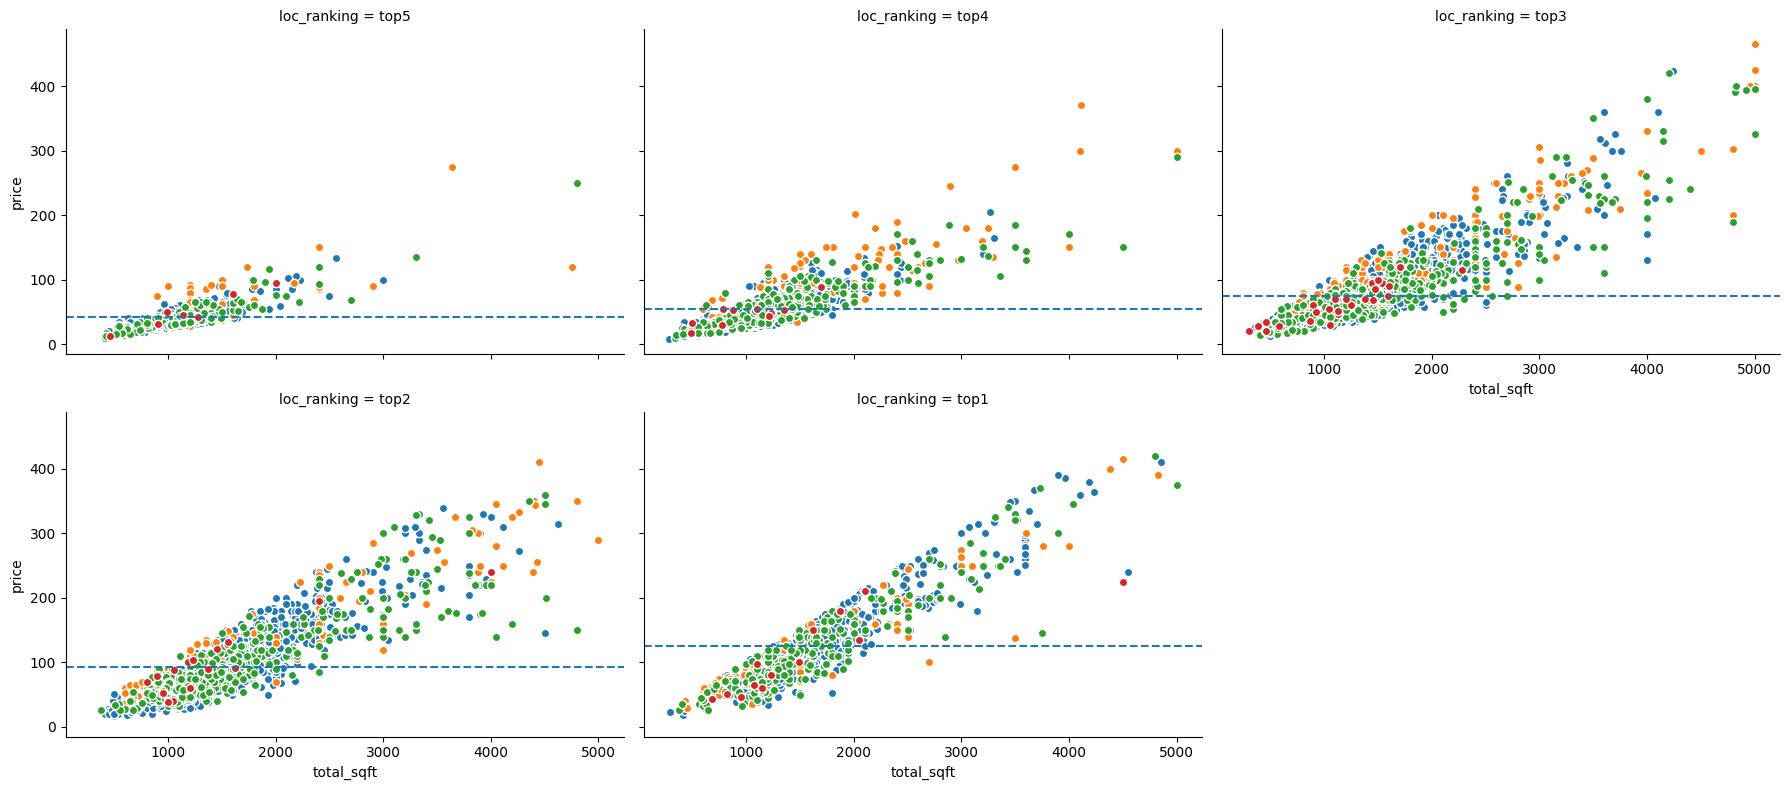

In [32]:
g = sns.FacetGrid(df4, hue='area_type', col='loc_ranking', col_wrap=3, height=4, aspect=1.5,
                  col_order=['top5', 'top4', 'top3', 'top2', 'top1'])
g = g.map(plt.scatter, "total_sqft", "price", edgecolor="w")
ax1, ax2, ax3, ax4, ax5 = g.axes

ax1.axhline(avg_top5, ls='--')
ax2.axhline(avg_top4, ls='--')
ax3.axhline(avg_top3, ls='--')
ax4.axhline(avg_top2, ls='--')
ax5.axhline(avg_top1, ls='--')
plt.show()

In [58]:
# df3[df3['location_label']=='other'].sort_values(by=['price_per_sqft', 'location'], ascending=False).head(30)

In [59]:
# interquartile = df2.describe()['price_per_sqft']['75%'] - df2.describe()['price_per_sqft']['25%']

In [60]:
# dummies = pd.get_dummies(df3.location)

In [61]:
# df4 = pd.concat([df3, dummies.drop('other', axis='columns')], axis='columns')

In [34]:
X = df5.drop(['price'], axis='columns')


In [35]:
y = df5.price

In [36]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression

In [37]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)
# sum(cross_val_score(LinearRegression(), X, y, cv=cv))/5

array([0.83790993, 0.81348682, 0.81703622, 0.81810641, 0.81745248])

In [38]:
sum(cross_val_score(LinearRegression(), X, y, cv=cv))/5

0.8207983729886313

In [39]:
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

In [40]:
errors = list(y - preds)

In [69]:
y.describe()

count    10852.000000
mean        77.658879
std         49.996226
min          8.000000
25%         46.407500
50%         64.310000
75%         90.532500
max        465.000000
Name: price, dtype: float64

In [41]:
data = {'preds': list(preds), 'errors': errors, 'total_sqft':list(X.total_sqft)}
res = pd.DataFrame(data)
res

,preds,errors,total_sqft
0,36.156775,2.913225,1056.0
1,165.442818,-45.442818,2600.0
2,61.120792,0.879208,1440.0
3,93.979921,1.020079,1521.0
4,61.989747,-10.989747,1200.0
...,...,...,...
10847,58.850564,-1.850564,1345.0
10848,104.306405,7.693595,1715.0
10849,216.648929,14.351071,3453.0
10850,48.275787,11.724213,1141.0


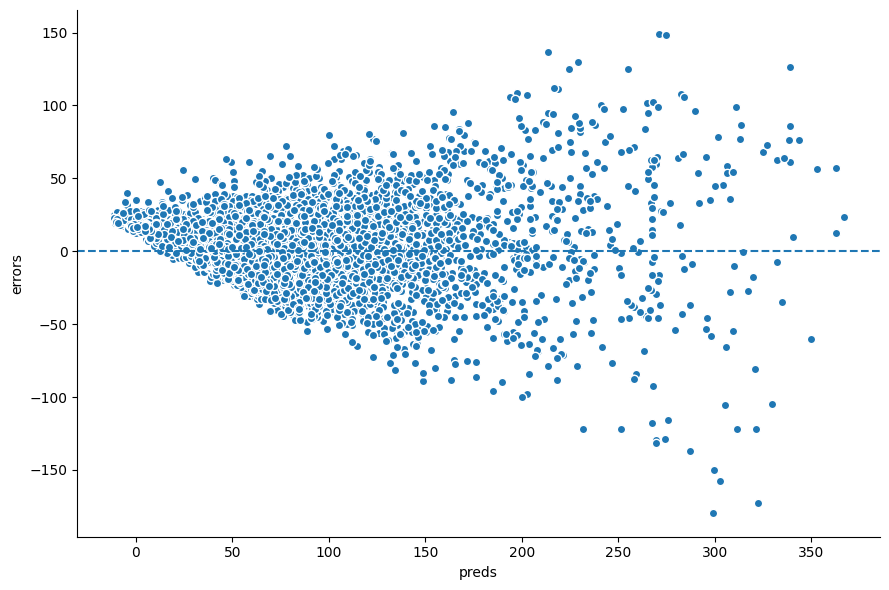

In [42]:
g = sns.FacetGrid(res, height=6, aspect=1.5)
g = g.map(plt.scatter, "preds", "errors", edgecolor="w")
ax1 = g.ax

ax1.axhline(0, ls='--')
plt.show()

##### We can certainly see that the assumption of linear regression is not ok because the variance of error increases as total sqft rises
#### As a result, we'll develop other models, but still use linear regression for dashboard in powerbi

In [43]:
coef = lr.coef_

In [49]:
lr.coef_

In [45]:
lr.intercept_

9.989122160978553

In [50]:
components = pd.DataFrame({'components': X.columns, 'values': coef})

TypeError: all inputs must be Index

In [47]:
components = components.append({'components': 'intercept', 'values': lr.intercept_}, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [77]:
# df3.to_csv('house_price.csv', index=False)
# loc_dimension.to_csv('loc_dimension.csv', index=False)
components.to_csv('components.csv', index=False)